# Υπολογιστική Γεωμετρία - Εργασία 2022-2023

# Μέρος Α - Υλοποίηση 1: Κυρτό Περίβλημα
---

**Ευγενία Κοζή (1115202000082)**

**<u>1) <u>Κυρτό Περίβλημα σε 2 Διαστάσεις</u></u>**

**Κατηγόρημα Προσανατολισμού σε 2 Διαστάσεις**

Υπολογίζουμε το CCW($p_0, p_1, p_2$). Αν είναι:
*  Μηδέν, τότε τα σημεία είναι συνευθειακά
*  Θετικό, τότε η στροφή είναι αντίθετη της φοράς των δεικτών του ρολογιού (αριστερόστροφα - CCW)
* Αρνητικό, τότε η στροφή είναι ίδια με τη φορά των δεικτών του ρολογιού (δεξιόστροφα - CW)

In [2]:
# Calculate CCW

def orientation_predicate(p0, p1, p2):

  value = (p1[0]*p2[1] - p2[0]*p1[1]) - (p0[0]*p2[1] - p0[1]*p2[0]) + (p0[0]*p1[1] - p0[1]*p1[0]) # Determinant 3X3

  return value

**Εκτύπωση Κυρτού Περιβλήματος σε 2 Διαστάσεις**

Με τη συνάρτηση αυτή χρησιμοποιούμε το ConvexHull της Python, δίνοντάς του τα αρχικά μας σημεία, για την εκτύπωση του σχήματος με τη λύση.

In [3]:
# Visual representation of the convex hull in 2D

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def plot_2D(points):

  print("\n                          PLOT OF CONVEX HULL:")
  points_array = np.array(points) # 2D Array with points
  hull = ConvexHull(points_array)

  # Plot
  plt.plot(points_array[:, 0], points_array[:, 1], 'o')
  for simplex in hull.simplices:
    plt.plot(points_array[simplex, 0], points_array[simplex, 1], 'k-')

  plt.show()

<u>Υλοποίηση αλγορίθμων για την εύρεση κυρτού περιβλήματος στο επίπεδο (2 διαστάσεις)</u>:

* **Αυξητικός Αλγόριθμος Graham Scan**

Είσοδος: Ένα σύνολο σημείων σε γενική θέση

Έξοδος: Μία λίστα των κορυφών του κυρτού περιβλήματος σε ωρολόγια διάταξη

Τα σημεία ταξινομούνται με βάση την αύξουσα σειρά των τετμημένων τους. Αν δύο σημεία έχουν ίδια τετμημένη τότε αυτά ταξινομούνται με βάση την τεταγμένη τους.

Η μεταβλητή choice υπάρχει για να εκτυπωθούν κάποια επιπλέον αποτελέσματα ή αναλυτικά βήματα (για την οπτικοποίηση που ζητείται).

In [4]:
# Incremental Algorithm Graham Scan

def Graham_Scan(points, choice):

  Lup = []
  Ldown = []
  n = len(points) # number of points

  if choice == 0 or choice == 1:
    print("\nINCREMENTAL ALGORITHM GRAHAM SCAN\n")
  else:
    print("INCREMENTAL ALGORITHM GRAHAM SCAN")

  # Sort the points according to their x-value in increasing order
  # If more than one point has the smallest x value, take the one with the smallest y value
  points.sort(key = lambda p:[p[0], p[1]])

  # Print the sorted points
  if choice == 0 or choice == 1:
    print(str(n), "sorted random points:", points)

  # Find the first 2 points for Lup
  Lup.append(points[0]) # the point with the lowest x-coordinate
  Lup.append(points[1])

  if choice == 1:
    print("\nCreating Lup:\n" + "\nInsert the first 2 points of Lup: " + str(points[0]) + ", " + str(points[1]))

  # Lup
  for i in range(2, n):
    if choice == 1:
      print("Insert to Lup:", str(points[i]))
    Lup.append(points[i])
    while (len(Lup) > 2) and (orientation_predicate(Lup[-3], Lup[-2], Lup[-1]) > 0): # CounterClockWise, left turn
      if choice == 1:
        print("CCW(" + str(Lup[-3]) + ", " + str(Lup[-2]) + ", " + str(Lup[-1]) + ") > 0")
        print("Remove from Lup:", str(Lup[-2]))
      Lup.pop(-2)

  # Print Lup
  if choice == 0 or choice == 1:
    print("\nLup:", Lup)

  # Find the first 2 points for Ldown
  Ldown.append(points[n - 1])
  Ldown.append(points[n - 2])

  if choice == 1:
    print("\nCreating Ldown:\n" + "\nInsert the first 2 points of Ldown: " + str(points[n - 1]) + ", " + str(points[n - 2]))

  # L down
  for i in range(n - 3, -1, -1):
    if choice == 1:
      print("Insert to Ldown:", str(points[i]))
    Ldown.append(points[i])
    while (len(Ldown) > 2) and (orientation_predicate(Ldown[-3], Ldown[-2], Ldown[-1]) > 0): # CounterClockWise, left turn
      if choice == 1:
        print("CCW(" + str(Ldown[-3]) + ", " + str(Ldown[-2]) + ", " + str(Ldown[-1]) + ") > 0")
        print("Remove from Ldown:", str(Ldown[-2]))
      Ldown.pop(-2)

  # Print Ldown
  if choice == 0 or choice == 1:
    print("\nLdown:", Ldown)

  if choice == 1:
    print("\nRemove from Ldown the first and last point: " + str(Ldown[0]) + ", " + str(Ldown[-1]))

  # Remove first and last point from Ldown
  Ldown.pop(-1)
  Ldown.pop(0)

  if choice == 1:
    print("Ldown:", Ldown, "\n\nCombine Lup and Ldown")

  # Create convex hull
  convex_hull = Lup.copy()
  for i in range(0, len(Ldown)):
    convex_hull.append(Ldown[i])

  # Print convex hull
  print("\nConvex Hull:", convex_hull)
  print("\nConvex hull consists of", str(len(convex_hull)), "points.")

  return convex_hull

* **Αλγόριθμος του Περιτυλίγματος (Gift Wrapping)**

In [5]:
# Gift Wrapping Algorithm

def Gift_Wrapping(points):

  print("\nGIFT WRAPPING ALGORITHM\n")

  # Find the point with the smallest x-coordinate
  start_point = min(points, key=lambda p:[p[0], p[1]])

  # Initialize the hull with the start point
  convex_hull = [start_point]
  current_point = start_point

  # Find the next point
  while True:
    next_point = None
    for p in points:
      if p == current_point:
        continue
      if next_point is None or orientation_predicate(current_point, next_point, p) < 0: # CW
        next_point = p
    if next_point == start_point:
        break
    convex_hull.append(next_point)
    current_point = next_point

  print("Convex Hull:", convex_hull)
  print("\nConvex hull consists of", str(len(convex_hull)), "points.")

  return convex_hull

* **Αλγόριθμος Διαίρει και Βασίλευε (Divide and Conquer)**

Είσοδος: Ένα σύνολο σημείων, ταξινομημένων ως προς την τετμημένη, σε γενική θέση

Έξοδος: Η αλυσίδα των ακμών και κορυφών του κυρτού περιβλήματος

Αλγόριθμος:

* Χωρίζουμε τα σημεία σε 2 σύνολα: το ένα περιέχει τα $\frac{n}{2}$ αριστερά σημεία (left half) και το άλλο τα $\frac{n}{2}$ δεξιά σημεία (right half)
* Αναδρομικός υπολογισμός των κυρτών περιβλημάτων left hull και right hull
* Επισύναψη των 2 κυρτών περιβλημάτων (Merge_Hulls)

Η συνάρτηση Merge_Hulls ενώνει τα δύο κυρτά περιβλήματα χρησιμοποιώντας τη μέθοδο του Graham Scan με εύρεση άνω και κάτω περιβλήματος.

In [6]:
# Divide and Conquer Algorithm

def Divide_and_Conquer(points):
  # Base Case
  if len(points) <= 3:
    return points

  # Divide the points in half
  mid = len(points) // 2
  left_half = points[:mid]
  right_half = points[mid:]

  # Compute the left and right hull
  left_hull = Divide_and_Conquer(left_half)
  right_hull = Divide_and_Conquer(right_half)

  return Merge_Hulls(left_hull, right_hull)

# Merge two convex hulls
def Merge_Hulls(left_hull, right_hull):

  # Upper and Lower Hulls
  Lup = Upper_Hull(left_hull, right_hull)
  Ldown = Lower_Hull(left_hull, right_hull)

  # Create convex hull
  convex_hull = Lup.copy()
  for i in range(0, len(Ldown)):
    convex_hull.append(Ldown[i])

  return convex_hull

def Upper_Hull(hull_a, hull_b):
  points = hull_a.copy()
  points.extend(hull_b)
  Lup = []
  n = len(points) # number of points

  # Sort the points according to their x-value in increasing order
  points.sort(key = lambda p:[p[0], p[1]])

  # Find the first 2 points for Lup
  Lup.append(points[0])
  Lup.append(points[1])

  # Lup
  for i in range(2, n):
    Lup.append(points[i])
    while (len(Lup) > 2) and (orientation_predicate(Lup[-3], Lup[-2], Lup[-1]) > 0): # CounterClockWise, left turn
      Lup.pop(-2)

  return Lup

def Lower_Hull(hull_a, hull_b):
  points = hull_a.copy()
  points.extend(hull_b)
  Ldown = []
  n = len(points) # number of points

  # Sort the points according to their x-value in increasing order
  points.sort(key = lambda p:[p[0], p[1]])

  # Find the first 2 points for Ldown
  Ldown.append(points[n - 1])
  Ldown.append(points[n - 2])

  # L down
  for i in range(n - 3, -1, -1):
    Ldown.append(points[i])
    while (len(Ldown) > 2) and (orientation_predicate(Ldown[-3], Ldown[-2], Ldown[-1]) > 0): # CounterClockWise, left turn
      Ldown.pop(-2)

  # Remove first and last point from Ldown
  Ldown.pop(-1)
  Ldown.pop(0)

  return Ldown

* **Αλγόριθμος QuickHull**

Χρησιμοποιείται η συνάρτηση <u>ConvexHull</u> που έχει υλοποιηθεί στη <u>βιβλιοθήκη scipy.spatial</u> της Python και υπολογίζει το κυρτό περίβλημα με τον <u>αλγόριθμο QuickHull</u>.

In [ ]:
# QuickHull Algorithm

import numpy as np
from scipy.spatial import ConvexHull

def QuickHull(points):

  print("\nQUICKHULL ALGORITHM")
  convex_hull = []
  points = np.array(points)
  hull = ConvexHull(points)
  hull_points = points[hull.vertices]

  for t in hull_points:
    convex_hull.append((t[0], t[1]))

  print("\nConvex Hull:", convex_hull)
  print("\nConvex hull consists of", str(len(convex_hull)), "points.")

  return convex_hull

**2) <u>Εκφυλισμένες Περιπτώσεις</u>**

Συμπεριφορά των παραπάνω αλγορίθμων σε εκφυλισμένες περιπτώσεις:

* <u>Συνευθειακά σημεία</u>: Αν η είσοδος περιέχει πολλά συνευθειακά σημεία τότε οι αλγόριθμοι μπορεί να μην τα χειριστούν σωστά, οπότε χρειάζονται επιπλέον βήματα και έλεγχοι (μέθοδος απειροελάχιστης διαταραχής).

* <u>Διπλότυπα σημεία</u>: Οι αλγόριθμοι υποθέτουν ότι το κάθε σημείο είναι μοναδικό. Οπότε το να υπάρχουν διπλότυπα μπορεί να προκαλέσει περίεργη συμπεριφορά και λάθος αποτελέσματα. Είναι σημαντικό πριν δώσουμε την είσοδο να έχουμε αφαιρέσει όλα τα διπλότυπα.

* Υπάρχουν τρόποι κατανομής των σημείων που κάνουν τους αλγορίθμους λιγότερο αποτελεσματικούς ή να αποτύχουν. Μία περίπτωση είναι αν τα σημεία βρίσκονται σε μία <u>ευθεία</u>. Πρέπει να γίνονται επιπλέον έλεγχοι και τροποποιήσεις στους αλγορίθμους για τέτοιες ειδικές περιπτώσεις.

* <u>Floating point precision</u>: Λάθη λόγω αριθμητικής ακρίβειας στους υπολογισμούς που μπορεί να δώσουν λάθος αποτελέσματα.

**3) <u>Κυρτό Περίβλημα σε 3 Διαστάσεις</u>**

Υλοποίηση αλγορίθμου για την εύρεση κυρτού περιβλήματος σε 3 διαστάσεις

**Κατηγόρημα Προσανατολισμού σε 3 διαστάσεις**

Αν το πρόσημο είναι:

* Μηδέν, τότε τα σημεία είναι συνεπίπεδα
* Ίδιο από ότι με οποιοδήποτε σημείο του τρέχοντος πολυέδρου, τότε η έδρα δεν είναι ορατή από το νέο σημείο (γαλάζια)
* Διαφορετικό από ότι με οποιοδήποτε σημείο του τρέχοντος πολυέδρου, τότε η έδρα είναι ορατή από το νέο σημείο (κόκκινη)

In [ ]:
import numpy as np
from numpy.linalg import linalg

def orientation_3D(p0, p1, p2, p3):
  new_p0 = (1, p0[0], p0[1], p0[2])
  new_p1 = (1, p1[0], p1[1], p1[2])
  new_p2 = (1, p2[0], p2[1], p2[2])
  new_p3 = (1, p3[0], p3[1], p3[2])

  points_array = np.array([new_p0, new_p1, new_p2, new_p3]) # 2D Array with points
  value = linalg.det(points_array)

  return value

**Αλγόριθμος QuickHull σε 3 Διαστάσεις**

Χρησιμοποιείται η συνάρτηση <u>ConvexHull</u> που έχει υλοποιηθεί στη <u>βιβλιοθήκη scipy.spatial</u> της Python και υπολογίζει το κυρτό περίβλημα με τον <u>αλγόριθμο QuickHull</u>.

In [ ]:
# QuickHull Algorithm

def QuickHull_3D(points):

  print("\nQUICKHULL ALGORITHM")
  convex_hull = []
  points = np.array(points)
  hull = ConvexHull(points)
  hull_points = points[hull.vertices]

  for t in hull_points:
    convex_hull.append((t[0], t[1], t[2]))

  print("\nConvex Hull:", convex_hull)
  print("\nConvex hull consists of", str(len(convex_hull)), "points.")

  return convex_hull

**<u>Εφαρμογή 1</u>**

**1) <u>Δημιουργία Σημείων</u>**

Δημιουργία τυχαίων σημείων σε δύο διαστάσεις σε γενική θέση:

* Συνάρτηση **points_2D:** Οι συντεταγμένες των σημείων είναι ακέραιοι αριθμοί με τετμημένη $MIN\leq x\leq MAX$ και τεταγμένη $MIN\leq y\leq MAX$ . Για να βρίσκονται όλα τα σημεία σε γενική θέση, γίνεται κατάλληλος έλεγχος κατά τη δημιουργία και εισαγωγή των σημείων στη λίστα initial_points, υπολογίζοντας το κατηγόρημα προσανατολισμού (orientation_predicate). Έτσι ξέρουμε ότι δεν υπάρχει τριάδα σημείων που να είναι συνευθειακά. Όμως αυτή η συνάρτηση έχει μεγάλη χρονική πολυπλοκότητα.

* Συνάρτηση **generate_points_2D:** Οι συντεταγμένες των σημείων είναι δεκαδικοί αριθμοί μεγάλης ακρίβειας, με τετμημένη $0\leq x\leq 100$ και τεταγμένη $0\leq y\leq 100$. Δε γίνεται άμεσα κάποιος έλεγχος για το αν τα σημεία βρίσκονται σε γενική θέση, όμως αυτό υποθέτουμε διότι λόγω της μεγάλης ακρίβειας των συντεταγμένων τους είναι σχεδόν απίθανο να υπάρχει τριάδα σημείων που να είναι συνευθειακά. Η συνάρτηση δημιουργήθηκε για να μπορούμε να δημιουργήσουμε γρήγορα έναν μεγάλο αριθμό σημείων.

* Συνάρτηση **points_divide_conquer**: Χρησιμοποιείται για τον αλγόριθμο Divide and Conquer όπου πρέπει τα σημεία να έχουν διαφορετικές τετμημένες το καθένα και να είναι και σε γενική θέση. Τα σημεία έχουν ακέραιες συντεταγμένες, με τετμημένη $MIN\leq x\leq MAX$ και τεταγμένη $MIN\leq y\leq MAX$, και η λίστα που επιστρέφεται έχει ταξινομημένα τα σημεία σε αύξουσα σειρά με βάση την τετμημένη τους.

In [ ]:
# Create random points in generic position

from numpy import random
import matplotlib.pyplot as plt

def points_2D(size, minimum, maximum):

  # Create the first 2 points
  initial_points = [(random.randint(minimum, maximum), random.randint(minimum, maximum)) for i in range(2)]

  # Create points in generic position
  while len(initial_points) < size:
    new_point = (random.randint(minimum, maximum), random.randint(minimum, maximum))
    flag = 1
    for i in range(0, len(initial_points) - 1):
      x1 = initial_points[i]
      for j in range(i + 1, len(initial_points)):
        x2 = initial_points[j]
        if (orientation_predicate(x1, x2, new_point) == 0):
          flag = 0
          break
      if (flag == 0):
        break
    if (flag == 1):
      initial_points.append(new_point)

  return initial_points

# The random nature of the coordinates should make it unlikely that any 3 points will be collinear
def generate_points_2D(n):
  points = []
  for i in range(n):
      x = random.random() * 100
      y = random.random() * 100
      points.append((x, y))

  return points

# Create random points in generic position for the Divide and Conquer Algorithm
def points_divide_conquer(size, minimum, maximum):

  # Create the first 2 points
  initial_points = []
  initial_points.append((0, random.randint(minimum, maximum)))
  initial_points.append((1, random.randint(minimum, maximum)))
  count = 2

  # Create points in generic position
  while len(initial_points) < size:
    new_point = (count, random.randint(minimum, maximum))
    count = count + 1
    flag = 1
    for i in range(0, len(initial_points) - 1):
      x1 = initial_points[i]
      for j in range(i + 1, len(initial_points)):
        x2 = initial_points[j]
        if (orientation_predicate(x1, x2, new_point) == 0):
          flag = 0
          count = count - 1
          break
      if (flag == 0):
        break
    if (flag == 1):
      initial_points.append(new_point)

  return initial_points

**α) <u>Κυρτό Περίβλημα σε 2 Διαστάσεις</u>**

Βρίσκουμε το κυρτό περίβλημα μιας λίστας σημείων initial_points και παρουσιάζουμε τα αποτελέσματα σαν λίστα σημείων και σχηματικά.

**Αυξητικός Αλγόριθμος, Αλγόριθμος του περιτυλίγματος, Αλγόριθμος QuickHull**
* Δημιουργία 80 τυχαίων σημείων που βρίσκονται σε γενική θέση, με τετμημένη $0\leq x\leq 100$ και τεταγμένη $0\leq y\leq 100$.

80 random points in generic position:
[(58, 23), (20, 79), (60, 9), (22, 86), (1, 43), (79, 36), (5, 80), (72, 30), (12, 22), (50, 72), (65, 22), (63, 69), (45, 52), (56, 26), (48, 26), (11, 17), (33, 18), (100, 28), (94, 20), (6, 37), (4, 3), (84, 34), (64, 59), (68, 97), (71, 12), (51, 11), (90, 45), (24, 84), (78, 74), (30, 74), (86, 38), (54, 57), (37, 47), (0, 36), (0, 0), (83, 65), (61, 30), (68, 6), (89, 93), (93, 65), (6, 66), (18, 71), (81, 70), (90, 28), (52, 96), (51, 96), (89, 14), (15, 78), (7, 73), (27, 19), (67, 40), (47, 42), (87, 76), (60, 53), (100, 94), (99, 95), (23, 4), (82, 100), (48, 53), (35, 85), (23, 13), (19, 1), (46, 7), (32, 93), (85, 49), (79, 4), (82, 19), (5, 35), (69, 56), (40, 1), (73, 42), (91, 18), (47, 69), (63, 92), (45, 39), (4, 89), (9, 90), (44, 91), (62, 71), (29, 91)]

                             INITIAL POINTS:


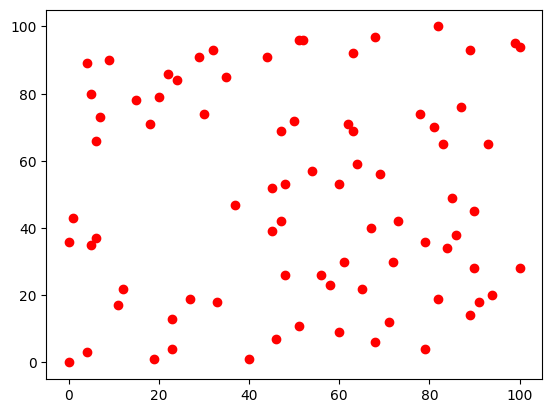


INCREMENTAL ALGORITHM GRAHAM SCAN

80 sorted random points: [(0, 0), (0, 36), (1, 43), (4, 3), (4, 89), (5, 35), (5, 80), (6, 37), (6, 66), (7, 73), (9, 90), (11, 17), (12, 22), (15, 78), (18, 71), (19, 1), (20, 79), (22, 86), (23, 4), (23, 13), (24, 84), (27, 19), (29, 91), (30, 74), (32, 93), (33, 18), (35, 85), (37, 47), (40, 1), (44, 91), (45, 39), (45, 52), (46, 7), (47, 42), (47, 69), (48, 26), (48, 53), (50, 72), (51, 11), (51, 96), (52, 96), (54, 57), (56, 26), (58, 23), (60, 9), (60, 53), (61, 30), (62, 71), (63, 69), (63, 92), (64, 59), (65, 22), (67, 40), (68, 6), (68, 97), (69, 56), (71, 12), (72, 30), (73, 42), (78, 74), (79, 4), (79, 36), (81, 70), (82, 19), (82, 100), (83, 65), (84, 34), (85, 49), (86, 38), (87, 76), (89, 14), (89, 93), (90, 28), (90, 45), (91, 18), (93, 65), (94, 20), (99, 95), (100, 28), (100, 94)]

Lup: [(0, 0), (0, 36), (4, 89), (9, 90), (51, 96), (82, 100), (99, 95), (100, 94)]

Ldown: [(100, 94), (100, 28), (94, 20), (89, 14), (79, 4), (40, 1), (0

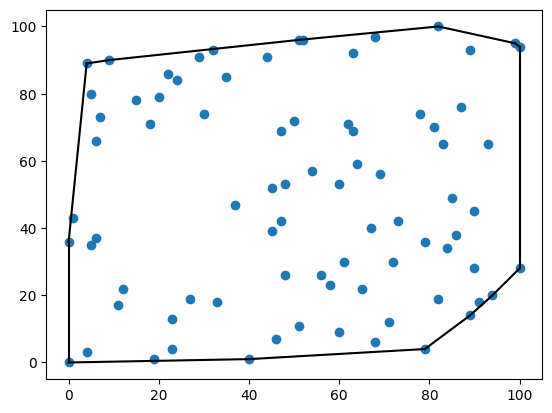

In [ ]:
# Create 80 random points in generic position for all of the algorithms: Graham Scan, Gift Wrapping, QuickHull
initial_points = points_2D(80, 0, 101)

# Print the points
print(str(len(initial_points)) + " random points in generic position:")
print(initial_points)

# Visual representation of the points
print("\n                             INITIAL POINTS:")
xs = []
ys = []

for i in range(0, len(initial_points)):
  t = initial_points[i]
  xs.append(t[0])
  ys.append(t[1])

# Plot
plt.scatter(xs, ys, color="red")
plt.show()

# Incremental Algorithm: Graham Scan
convex_hull1 = Graham_Scan(initial_points, 0) # Solution

# Gift Wrapping Algorithm
convex_hull2 = Gift_Wrapping(initial_points) # Solution

# QuickHull Algorithm
convex_hull3 = QuickHull(initial_points) # Solution

# Visual representation
plot_2D(initial_points)

Τη λίστα των σημείων του κυρτού περιβλήματος (δηλαδή τη λύση) τη βρίσκουμε με τον αλγόριθμο που υλοποιήσαμε. Μετά χρησιμοποιούμε το ConvexHull της Python, δίνοντάς του τα αρχικά μας σημεία, για την εκτύπωση του σχήματος με τη λύση. Έτσι επαληθεύουμε και οπτικά το αποτέλεσμα που έχουμε βρει.

Στο αποτέλεσμα του Graham Scan εκτυπώνουμε και τα $L_{άνω}$ και $L_{κάτω}$ (πριν του αφαιρέσουμε το πρώτο και το τελευταίο σημείο για την ένωση με το $L_{άνω}$) που προέκυψαν από την εκτέλεση του αλγορίθμου.

**Αλγόριθμος Διαίρει και Βασίλευε**
* Δημιουργία 80 τυχαίων σημείων, που βρίσκονται σε γενική θέση κι έχουν διαφορετικές τετμημένες μεταξύ τους, με τετμημένη $0\leq x\leq 100$ και τεταγμένη $0\leq y\leq 100$.
* Η λίστα points_DC έχει ταξινομημένα τα σημεία σε αύξουσα σειρά με βάση την τετμημένη τους.

80 random sorted points in generic position for the Divide and Conquer Algorithm:
[(0, 15), (1, 56), (2, 96), (3, 40), (4, 84), (5, 6), (6, 51), (7, 80), (8, 87), (9, 40), (10, 69), (11, 73), (12, 72), (13, 69), (14, 37), (15, 87), (16, 58), (17, 88), (18, 92), (19, 70), (20, 30), (21, 88), (22, 49), (23, 43), (24, 80), (25, 21), (26, 95), (27, 76), (28, 11), (29, 42), (30, 39), (31, 21), (32, 5), (33, 58), (34, 49), (35, 33), (36, 65), (37, 19), (38, 93), (39, 19), (40, 41), (41, 54), (42, 4), (43, 83), (44, 43), (45, 98), (46, 37), (47, 12), (48, 14), (49, 96), (50, 76), (51, 24), (52, 70), (53, 85), (54, 5), (55, 0), (56, 82), (57, 64), (58, 79), (59, 53), (60, 57), (61, 45), (62, 99), (63, 10), (64, 38), (65, 3), (66, 38), (67, 100), (68, 93), (69, 89), (70, 11), (71, 22), (72, 48), (73, 45), (74, 2), (75, 31), (76, 4), (77, 100), (78, 75), (79, 62)]

DIVIDE AND CONQUER ALGORITHM

Convex Hull: [(0, 15), (1, 56), (2, 96), (67, 100), (77, 100), (79, 62), (76, 4), (74, 2), (55, 0), (5

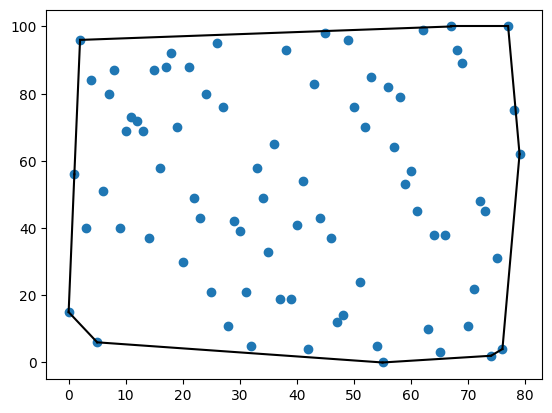

In [ ]:
# Create 80 random sorted points in generic position for the Divide and Conquer Algorithm
points_DC = points_divide_conquer(80, 0, 101)

# Print the points
print(str(len(points_DC)), "random sorted points in generic position for the Divide and Conquer Algorithm:")
print(points_DC)

# Divide and Conquer Algorithm
print("\nDIVIDE AND CONQUER ALGORITHM\n")

convex_hull4 = Divide_and_Conquer(points_DC) # Solution
print("Convex Hull:", convex_hull4)
print("\nConvex hull consists of", str(len(convex_hull4)), "points.")

# Visual representation
plot_2D(points_DC)

**β) <u>Οπτικοποίηση Βημάτων</u>**

Οπτικοποίηση των βημάτων του αλγορίθμου <u>Graham Scan</u> για την κατασκευή του κυρτού περιβλήματος στο επίπεδο
* Δημιουργούμε 10 τυχαία σημεία στο επίπεδο σε γενική θέση

10 random points in generic position:
[(12, 6), (1, 9), (18, 19), (13, 16), (10, 8), (6, 1), (4, 16), (4, 19), (15, 9), (1, 13)]

INCREMENTAL ALGORITHM GRAHAM SCAN

10 sorted random points: [(1, 9), (1, 13), (4, 16), (4, 19), (6, 1), (10, 8), (12, 6), (13, 16), (15, 9), (18, 19)]

Creating Lup:

Insert the first 2 points of Lup: (1, 9), (1, 13)
Insert to Lup: (4, 16)
Insert to Lup: (4, 19)
CCW((1, 13), (4, 16), (4, 19)) > 0
Remove from Lup: (4, 16)
Insert to Lup: (6, 1)
Insert to Lup: (10, 8)
CCW((4, 19), (6, 1), (10, 8)) > 0
Remove from Lup: (6, 1)
Insert to Lup: (12, 6)
CCW((4, 19), (10, 8), (12, 6)) > 0
Remove from Lup: (10, 8)
Insert to Lup: (13, 16)
CCW((4, 19), (12, 6), (13, 16)) > 0
Remove from Lup: (12, 6)
Insert to Lup: (15, 9)
Insert to Lup: (18, 19)
CCW((13, 16), (15, 9), (18, 19)) > 0
Remove from Lup: (15, 9)
CCW((4, 19), (13, 16), (18, 19)) > 0
Remove from Lup: (13, 16)

Lup: [(1, 9), (1, 13), (4, 19), (18, 19)]

Creating Ldown:

Insert the first 2 points of Ldown: (18, 19

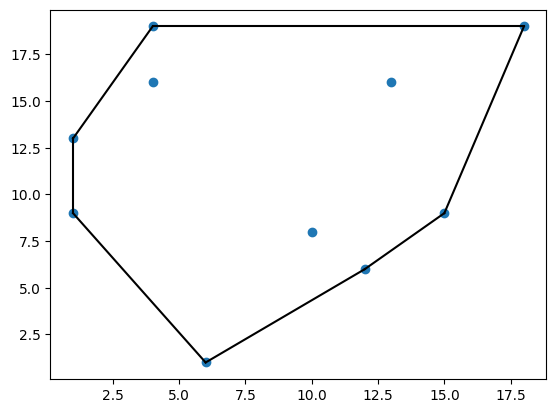

In [ ]:
# Create and print the points in generic position

points_graham = points_2D(10, 0, 20)
print(str(len(points_graham)), "random points in generic position:")
print(points_graham)

# Incremental Algorithm: Graham Scan
convex_hull_graham = Graham_Scan(points_graham, 1) # Solution

# Visual representation
plot_2D(points_graham)

**2) <u>Διάφορα Πλήθη Σημείων</u>**

Θεωρούμε διάφορα πλήθη σημείων στο επίπεδο και συγκρίνουμε τους παραπάνω αλγορίθμους με βάση τον χρόνο υλοποίησής τους και την ποιότητα των αποτελεσμάτων.

Για όλους τους αλγορίθμους δημιουργούμε τα σημεία με τη συνάρτηση generate_points_2D().

**Περίπτωση 1: 2.000 σημεία**

In [ ]:
import time

# Create random points in generic position
points1 = generate_points_2D(2000)

# Incremental Algorithm Graham Scan
start_time = time.time() # Get the current time in seconds
ch1_1 = Graham_Scan(points1, -1)
end_time = time.time() # Get the current time again
elapsed_time = end_time - start_time # Calculate the elapsed time
print(f"\nGraham Scan time: {elapsed_time:.2f} seconds") # Print the elapsed time with 2 decimal places

# Gift Wrapping Algorithm
start_time = time.time()
ch2_1 = Gift_Wrapping(points1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nGift Wrapping time: {elapsed_time:.2f} seconds")

# QuickHull Algorithm
start_time = time.time()
ch3_1 = QuickHull(points1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nQuickHull time: {elapsed_time:.2f} seconds")

# Divide and Conquer Algorithm
start_time = time.time()
points1_sorted = sorted(points1, key=lambda p: p[0])
ch4_1 = Divide_and_Conquer(points1_sorted)
print("\nDIVIDE AND CONQUER ALGORITHM\n")
print("Convex Hull:", ch4_1)
print("\nConvex hull consists of", str(len(ch4_1)), "points.")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nDivide and Conquer time: {elapsed_time:.2f} seconds")

INCREMENTAL ALGORITHM GRAHAM SCAN

Convex Hull: [(0.024856065263556548, 12.129336860150808), (0.267807975810086, 63.735581687989374), (0.38562568982286605, 75.69339477750539), (0.934845203824497, 98.86561645209014), (2.0111681063156306, 99.95950286071297), (98.29269173341632, 99.98214664964084), (99.26106494798836, 96.34090792388731), (99.88554023671253, 84.71629314213928), (99.98681262297912, 71.77192986359734), (99.99073621348677, 60.92381827924691), (99.93862644980887, 12.862006982292018), (99.53536203741004, 0.9545024215121378), (97.1487959796917, 0.07359473527077665), (79.5089497906127, 0.011049582409428105), (50.541803479624825, 0.1577000838735021), (13.80814769109282, 0.36684389477816826), (12.231215487329262, 0.42731472673342985), (6.3110880198106845, 1.516213299373681), (1.2776304504181324, 7.817480621495154)]

Convex hull consists of 19 points.

Graham Scan time: 0.02 seconds

GIFT WRAPPING ALGORITHM

Convex Hull: [(0.024856065263556548, 12.129336860150808), (1.27763045041813

**Περίπτωση 2: 10.000 σημεία**

In [ ]:
import time

# Create random points in generic position
points2 = generate_points_2D(10000)

# Incremental Algorithm Graham Scan
start_time = time.time()
ch1_2 = Graham_Scan(points2, -1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nGraham Scan time: {elapsed_time:.2f} seconds")

# Gift Wrapping Algorithm
start_time = time.time()
ch2_2 = Gift_Wrapping(points2)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nGift Wrapping time: {elapsed_time:.2f} seconds")

# QuickHull Algorithm
start_time = time.time()
ch3_2 = QuickHull(points2)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nQuickHull time: {elapsed_time:.2f} seconds")

# Divide and Conquer Algorithm
start_time = time.time()
points2_sorted = sorted(points2, key=lambda p: p[0])
ch4_2 = Divide_and_Conquer(points2_sorted)
print("\nDIVIDE AND CONQUER ALGORITHM\n")
print("Convex Hull:", ch4_2)
print("\nConvex hull consists of", str(len(ch4_2)), "points.")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nDivide and Conquer time: {elapsed_time:.2f} seconds")

INCREMENTAL ALGORITHM GRAHAM SCAN

Convex Hull: [(0.01134792873327406, 76.63968629447004), (0.019492451239477848, 93.79968029678342), (0.5129341882873728, 99.64126886134203), (4.034774363463867, 99.86070738020317), (6.1237394836884285, 99.96521486667379), (11.043717450817214, 99.98469670375245), (54.0030745757573, 99.98756916750683), (77.30985877289936, 99.96380936278226), (89.3405285775569, 99.91842265102201), (91.24624061621938, 99.87942200848299), (94.61957989320987, 99.57822969754635), (99.36513064263814, 99.1091380470617), (99.62749233879205, 99.06015992666093), (99.78774682651856, 96.22991401270374), (99.87193837381808, 84.71526394722402), (99.96309087067516, 68.60890563171377), (99.99345088114194, 13.854493917235022), (99.98963501867144, 5.156039017959935), (99.57076196039851, 3.795524548300977), (96.82803141896902, 0.7317148814353414), (95.28688157730666, 0.1309416729676105), (90.0132947557553, 0.023580395339284355), (57.09019982295703, 0.00738166308799082), (17.61098616782425,

**Περίπτωση 3: 30.000 σημεία**

In [ ]:
import time

# Create random points in generic position
points3 = generate_points_2D(30000)

# Incremental Algorithm Graham Scan
start_time = time.time()
ch1_3 = Graham_Scan(points3, -1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nGraham Scan time: {elapsed_time:.2f} seconds")

# Gift Wrapping Algorithm
start_time = time.time()
ch2_3 = Gift_Wrapping(points3)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nGift Wrapping time: {elapsed_time:.2f} seconds")

# QuickHull Algorithm
start_time = time.time()
ch3_3 = QuickHull(points3)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nQuickHull time: {elapsed_time:.2f} seconds")

# Divide and Conquer Algorithm
start_time = time.time()
points3_sorted = sorted(points3, key=lambda p: p[0])
ch4_3 = Divide_and_Conquer(points3_sorted)
print("\nDIVIDE AND CONQUER ALGORITHM\n")
print("Convex Hull:", ch4_3)
print("\nConvex hull consists of", str(len(ch4_3)), "points.")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nDivide and Conquer time: {elapsed_time:.2f} seconds")

INCREMENTAL ALGORITHM GRAHAM SCAN

Convex Hull: [(0.0021210959065487422, 96.59223978782845), (0.03588534970186963, 99.79032328643548), (0.1441586389935634, 99.90604074703342), (3.2717721662852917, 99.99479042827548), (81.09875713667941, 99.99916346649343), (91.84221230053868, 99.98328957173722), (97.53987632826716, 99.83779542407825), (99.30020039538911, 99.72971937363836), (99.8985704122149, 99.15720723531895), (99.99192447813428, 90.57697541817345), (99.99096439152618, 22.97769397951016), (99.98640789451252, 5.535712796764914), (99.904960092201, 0.17859490957931046), (93.19920170014616, 0.005024940788311838), (61.443832704825304, 0.0029585265366782743), (0.5889542060745545, 0.0019207944403354382), (0.1917963034281156, 0.9630472956331237), (0.04383873124449433, 3.487924003413967), (0.03515896012673547, 11.694338394951554), (0.006304735107809378, 60.378870992545)]

Convex hull consists of 20 points.

Graham Scan time: 0.26 seconds

GIFT WRAPPING ALGORITHM

Convex Hull: [(0.002121095906

**Χρόνος Υλοποίησης Αλγορίθμων**

Από την τελευταία περίπτωση μπορούμε να συμπεράνουμε ότι η σειρά των αλγορίθμων από τον πιο γρήγορο στον πιο αργό είναι η εξής:

1) Quick Hull \\
2) Graham Scan \\
3) Divide and Conquer \\
4) Gift Wrapping

**3) <u>Κυρτό Περίβλημα σε 3 Διαστάσεις</u>**

Θεωρούμε 50 σημεία στον χώρο $R^3$ σε <u>γενική θέση</u> με ακέραιες συντεταγμένες, με $0\leq x\leq 100$,  $0\leq y\leq 100$ και $0\leq z\leq 100$. Εφαρμόζουμε τον αλγόριθμο <u>QuickHull</u> που έχουμε υλοποιήσει για την κατασκευή του κυρτού περιβλήματος.

Γίνεται κατάλληλος έλεγχος κατά τη δημιουργία και εισαγωγή των σημείων στη λίστα points_3D, με τον υπολογισμό του κατηγορήματος προσανατολισμού (orientation_3D). Έτσι ξέρουμε ότι δεν υπάρχει τετράδα σημείων που να είναι συνεπίπεδα.

Για την απεικόνιση του κυρτού περιβλήματος έχουμε τα αρχικά σημεία σε μπλε, τις κορυφές του κυρτού περιβλήματος σε κόκκινο και τις ακμές του σε μαύρο.

50 random points in generic position:
[(22, 9, 74), (44, 33, 46), (78, 53, 69), (63, 82, 50), (25, 7, 77), (80, 59, 53), (3, 77, 31), (54, 69, 82), (41, 28, 3), (42, 100, 99), (98, 96, 47), (70, 2, 75), (85, 89, 20), (74, 9, 17), (72, 36, 6), (96, 16, 49), (15, 69, 21), (75, 70, 1), (48, 79, 83), (36, 16, 0), (95, 44, 100), (26, 82, 68), (37, 19, 79), (31, 26, 12), (45, 7, 64), (77, 100, 55), (1, 31, 95), (2, 65, 69), (26, 33, 27), (23, 53, 90), (49, 36, 13), (72, 92, 56), (38, 72, 14), (70, 64, 28), (40, 73, 78), (52, 71, 40), (47, 53, 97), (18, 56, 34), (51, 74, 79), (90, 97, 97), (59, 94, 30), (68, 7, 20), (23, 78, 90), (38, 16, 91), (39, 73, 30), (73, 66, 36), (68, 27, 66), (64, 13, 76), (39, 87, 45), (84, 48, 76)]

QUICKHULL ALGORITHM

Convex Hull: [(22, 9, 74), (25, 7, 77), (3, 77, 31), (42, 100, 99), (98, 96, 47), (70, 2, 75), (85, 89, 20), (74, 9, 17), (72, 36, 6), (96, 16, 49), (15, 69, 21), (75, 70, 1), (36, 16, 0), (95, 44, 100), (77, 100, 55), (1, 31, 95), (2, 65, 69), (38,

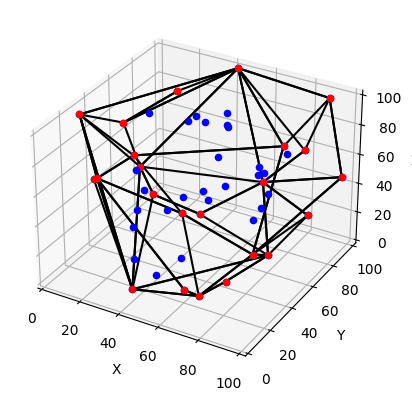

In [ ]:
# Create 50 random points in 3D in generic position

import numpy as np
from numpy import random
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

total = 50 # number of points
minimum = 0
maximum = 101

# Create the first 3 points
points_3D = [(random.randint(minimum, maximum), random.randint(minimum, maximum), random.randint(minimum, maximum)) for i in range(3)]

while len(points_3D) < total:
  new_point = (random.randint(minimum, maximum), random.randint(minimum, maximum), random.randint(minimum, maximum))
  flag = 1
  for i in range(0, len(points_3D) - 2):
    x1 = points_3D[i]
    for j in range(i + 1, len(points_3D) - 1):
      x2 = points_3D[j]
      for k in range (j + 1, len(points_3D)):
        x3 = points_3D[k]
        if (orientation_3D(x1, x2, x3, new_point) == 0):
          flag = 0
          break
      if (flag == 0):
        break
    if (flag == 0):
      break
  if (flag == 1):
    points_3D.append(new_point)

# Print the points
print(str(len(points_3D)) + " random points in generic position:")
print(points_3D)

# QuickHull Algorithm
convex_hull_3d = QuickHull_3D(points_3D) # Solution

# Plot the convex hull
hull = ConvexHull(points_3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original points
for p in points_3D:
    ax.scatter(p[0], p[1], p[2], c='b', marker='o')

# Plot the hull vertices
for v in hull.vertices:
    ax.scatter(points_3D[v][0], points_3D[v][1], points_3D[v][2], c='r', marker='o')

points_3D = np.array(points_3D)

# Plot the hull edges
for simplex in hull.simplices:
    ax.plot(points_3D[simplex, 0], points_3D[simplex, 1], points_3D[simplex, 2], 'k-')

# Set the plot limits and labels
ax.set_xlim3d(minimum, maximum)
ax.set_ylim3d(minimum, maximum)
ax.set_zlim3d(minimum, maximum)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()